###### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploratory Data Analysis

#### Load data

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/HAR'
hapt = '/HAPT Data Set'       # Human Activity Postural Transitions data set
har = '/UCI HAR Dataset'      # Human Activity Recognition data set

In [ ]:
# features = pd.read_csv(path1 + "/features.txt", encoding='utf-16')
features = list()
with open(path + har + '/features.txt') as f:
  for line in f:
    # features.append(line.split()[1])
    features.append(line.split('\n')[0])
    # features.append(line)

In [ ]:
path1 = path + har

# x_train = pd.read_csv(path1 + "/train/X_train.txt", sep=' ', header=None)
x_train = pd.read_csv(path1 + "/train/X_train.txt", delim_whitespace=True, names=features)
y_train = pd.read_csv(path1 + "/train/y_train.txt", header=None, encoding='utf-16')

x_test = pd.read_csv(path1 + "/test/X_test.txt", delim_whitespace=True, names=features)
# x_test = pd.read_csv(path1 + "/test/X_test.txt", header=None)
y_test = pd.read_csv(path1 + "/test/y_test.txt", header=None, encoding='utf-16')

#### Define dictionaries and dataframes for displaying metadata

In [ ]:
actions = {1:"Walking", 2:"Walking upstairs", 3:"Walking downstairs", 4:"Sitting", 5:"Standing", 6:"Laying"}
train_actions = {"Walking":0, "Walking upstairs":0, "Walking downstairs":0, "Sitting":0, "Standing":0, "Laying":0}
test_actions = {"Walking":0, "Walking upstairs":0, "Walking downstairs":0, "Sitting":0, "Standing":0, "Laying":0}
train_actions_portions = {"Walking":0, "Walking upstairs":0, "Walking downstairs":0, "Sitting":0, "Standing":0, "Laying":0}
test_actions_portions = {"Walking":0, "Walking upstairs":0, "Walking downstairs":0, "Sitting":0, "Standing":0, "Laying":0}

In [ ]:
train_total = y_train.shape[0]
test_total = y_test.shape[0]
for i in range(len(actions)):
  train_actions[actions[i+1]] = y_train.value_counts()[i+1]
  test_actions[actions[i+1]] = y_test.value_counts()[i+1]
  train_actions_portions[actions[i+1]] = train_actions[actions[i+1]] / train_total
  test_actions_portions[actions[i+1]] = test_actions[actions[i+1]] / test_total

In [ ]:
data = pd.DataFrame()
data['Action'] = actions.values()
data["Train"] = train_actions.values()
data["Test"] = test_actions.values()

data_portions = pd.DataFrame()
data_portions['Action'] = actions.values()
data_portions["Train portions"] = train_actions_portions.values()
data_portions["Test portions"] = test_actions_portions.values()

## Plot metadata

In [ ]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

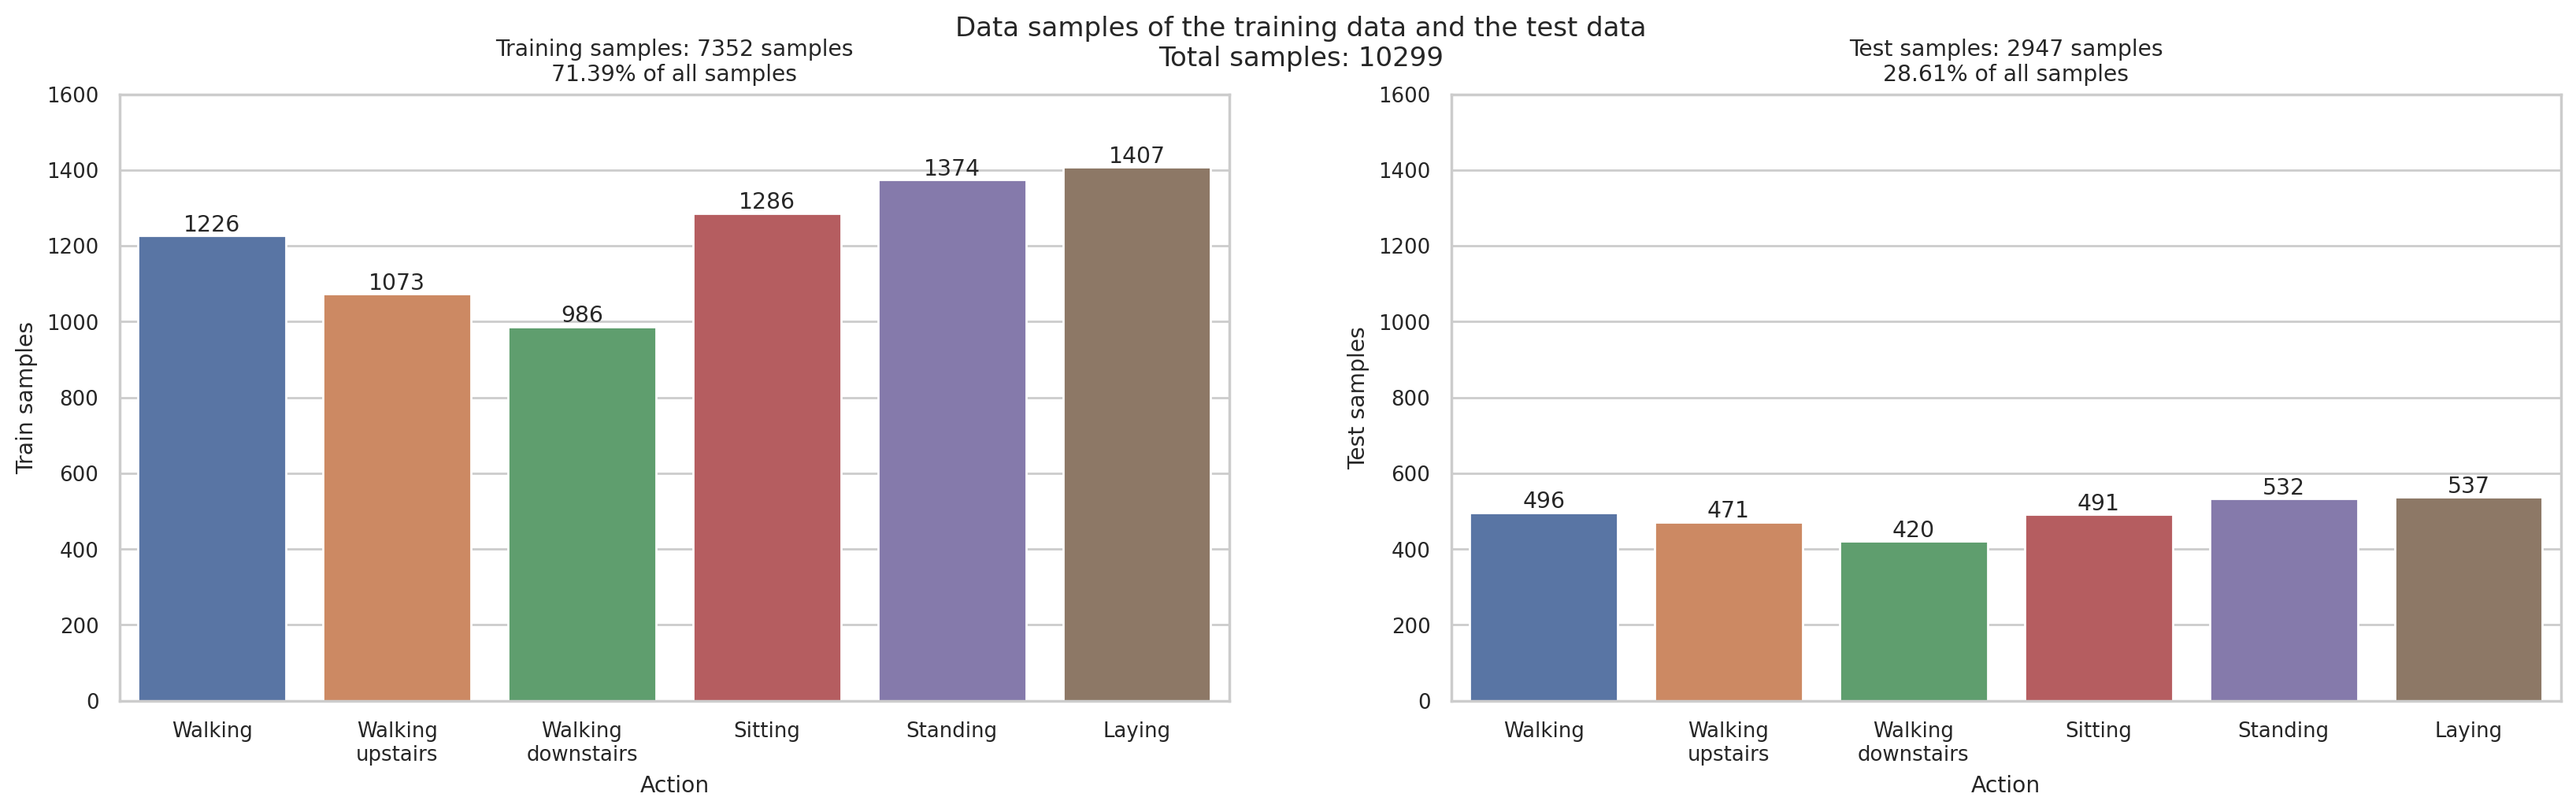

In [ ]:
train_samples = data['Train'].sum()
test_samples = data['Test'].sum()
total_samples = train_samples + test_samples

sns.set_theme(style='whitegrid', rc={'figure.dpi': 200}, font_scale=0.85)
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

plt.suptitle(f"Data samples of the training data and the test data\nTotal samples: {total_samples}")

# ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=15)

plt.subplot(1, 2, 1)
plt.title(f"Training samples: {train_samples} samples\n{round(train_samples/total_samples * 100, 2)}% of all samples")
# plt.bar(range(len(train_actions)), list(train_actions.values()), tick_label=list(train_actions.keys()))
sns.barplot(x='Action', y='Train', data=data)

plt.subplot(1, 2, 2)
plt.title(f"Test samples: {test_samples} samples\n{round(test_samples/total_samples * 100, 2)}% of all samples")
# plt.bar(range(len(test_actions)), list(test_actions.values()), tick_label=list(test_actions.keys()))
sns.barplot(x='Action', y='Test', data=data)

# y labels
ax[0].set(ylabel="Train samples")
ax[1].set(ylabel="Test samples")

# add values over each bar
for i in ax[0].containers:
  ax[0].bar_label(i,)
for i in ax[1].containers:
  ax[1].bar_label(i,)

# set test samples graph yticks to the train samples graph yticks
ax[1].set_yticks(ax[0].get_yticks())
ax[0].set_yticks(ax[0].get_yticks())

# wrap xlabels to new line when either: 1. new word, or 2. first word is longer than 10 characters
wrap_labels(ax[0], 10)
wrap_labels(ax[1], 10)

In [ ]:
# tmp = data_portions.select_dtypes(exclude=['object','string']) * 100

# tmp = data_portions.copy(deep=True)
# tmp[tmp.select_dtypes(include=['number']).columns] *= 10
# sns.barplot(x="Action", y='value', hue="variable", dodge=True, data=pd.melt(tmp, ['Action']), ax=ax)

<ipython-input-12-499c30f6b632>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick*100:.0f}%' for tick in yticks])


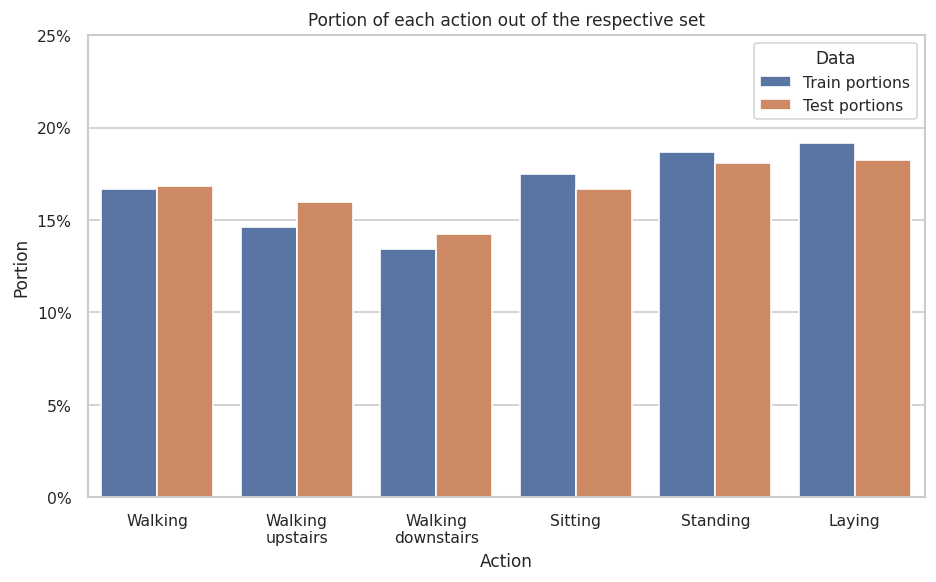

In [ ]:
sns.set_theme(style='whitegrid', rc={'figure.dpi': 120}, font_scale=0.85)
fig, ax = plt.subplots(figsize=(9, 5))

plt.title("Portion of each action out of the respective set")
sns.barplot(x="Action", y='value', hue="variable", dodge=True, data=pd.melt(data_portions, ['Action']), ax=ax)

# Set y-axis limits and tick labels
ax.set_ylim([0, 0.25])
yticks = ax.get_yticks()
ax.set_yticklabels([f'{tick*100:.0f}%' for tick in yticks])

ax.legend(title="Data")
ax.set(ylabel="Portion")

# wrap xlabels to new line when either: 1. new word, or 2. first word is longer than 10 characters
wrap_labels(ax, 10)

## Attempt to find most influential features

### Using correlation

Correlation between a feature and a label can be a useful indicator of how much influence that feature may have on the model's classification. However, correlation alone may not be sufficient to determine which feature has the largest effect on the model's classification on future data.

There are a few reasons for this. First, correlation does not necessarily imply causation. Just because two variables are correlated does not mean that one causes the other. It is possible that there is a third variable that is driving the relationship between the two variables.

Second, correlation may not capture complex interactions between variables. In some cases, the relationship between a feature and the label may be nonlinear or may depend on interactions with other features. In such cases, other techniques such as feature importance analysis or model interpretation may be necessary to determine the true impact of a feature on the model's classification.

Therefore, while correlation can be a useful tool for identifying potentially important features, it is important to use it in conjunction with other techniques to get a more complete picture of which features are most important for the model's classification on future data.

In [ ]:
train_df = x_train.copy(deep=True)
train_df['label'] = y_train
train_df

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,2
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,2
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,2
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,2


In [ ]:
corr_mat = train_df.corr()

In [ ]:
corr_with_label = corr_mat['label'].iloc[:-1]

In [ ]:
corr_with_label.sort_values(axis=0, ascending=True)

105 tBodyAccJerk-entropy()-Z    -0.859450
103 tBodyAccJerk-entropy()-X    -0.857454
368 fBodyAccJerk-entropy()-Y    -0.853579
104 tBodyAccJerk-entropy()-Y    -0.853425
235 tBodyAccJerkMag-entropy()   -0.847651
                                   ...   
13 tBodyAcc-min()-X              0.752129
135 tBodyGyro-min()-Z            0.758051
14 tBodyAcc-min()-Y              0.771205
93 tBodyAccJerk-min()-X          0.786288
94 tBodyAccJerk-min()-Y          0.788595
Name: label, Length: 561, dtype: float64

In [ ]:
corr_with_label.min()

-0.8594497443839451

### Using feature importance from tree-based models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# create a random forest classifier model
rfc = RandomForestClassifier(random_state=0)

# fit the model to your training data
rfc.fit(x_train, y_train.values.ravel())
# .values will give the values in a numpy array (shape: (n,1))
# .ravel will convert that array shape to (n, ) (i.e. flatten it)

# get feature importance scores
importances = rfc.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'feature': x_train.columns, 'importance': importances})

# sort the dataframe by feature importance score
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

Accuracy: 92.53%


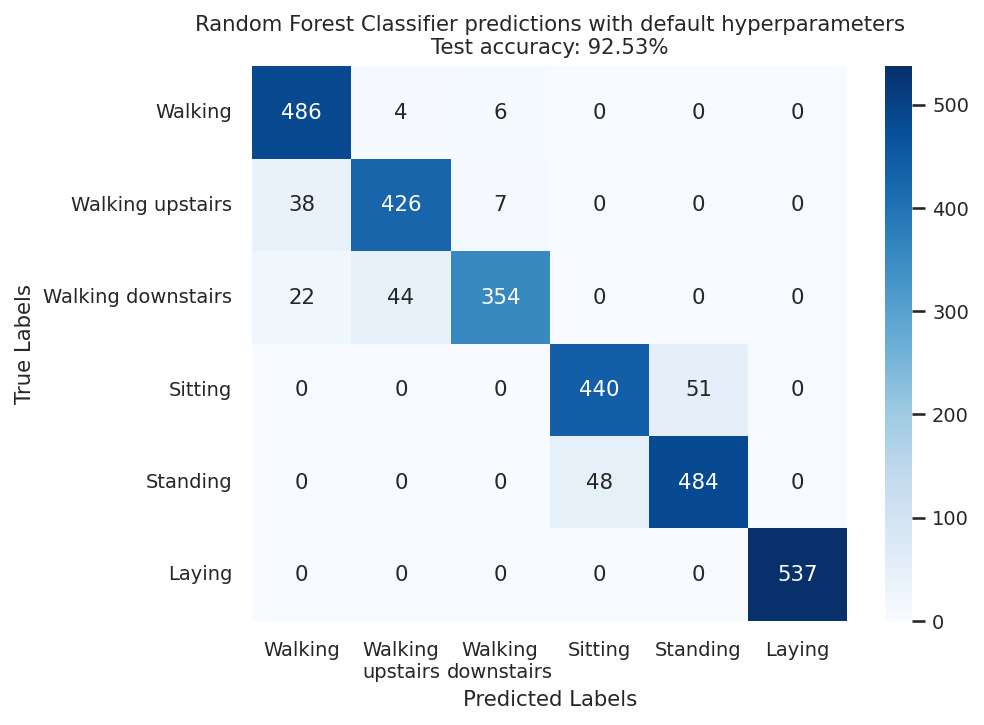

In [ ]:
y_pred = rfc.predict(x_test)

rfc_test_accuracy = accuracy_score(y_test, y_pred)
rfc_cm = confusion_matrix(y_test, y_pred)

sns.set_theme(style='whitegrid', rc={'figure.dpi': 150}, font_scale=0.85)
ax = sns.heatmap(rfc_cm, annot=True, cmap='Blues', fmt='g', yticklabels=actions.values(), xticklabels=actions.values())
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title(f'Random Forest Classifier predictions with default hyperparameters\nTest accuracy: {round(rfc_test_accuracy,4)*100}%')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

wrap_labels(ax, 10)

print(f"Accuracy: {round(rfc_test_accuracy,4)*100}%")
plt.show()

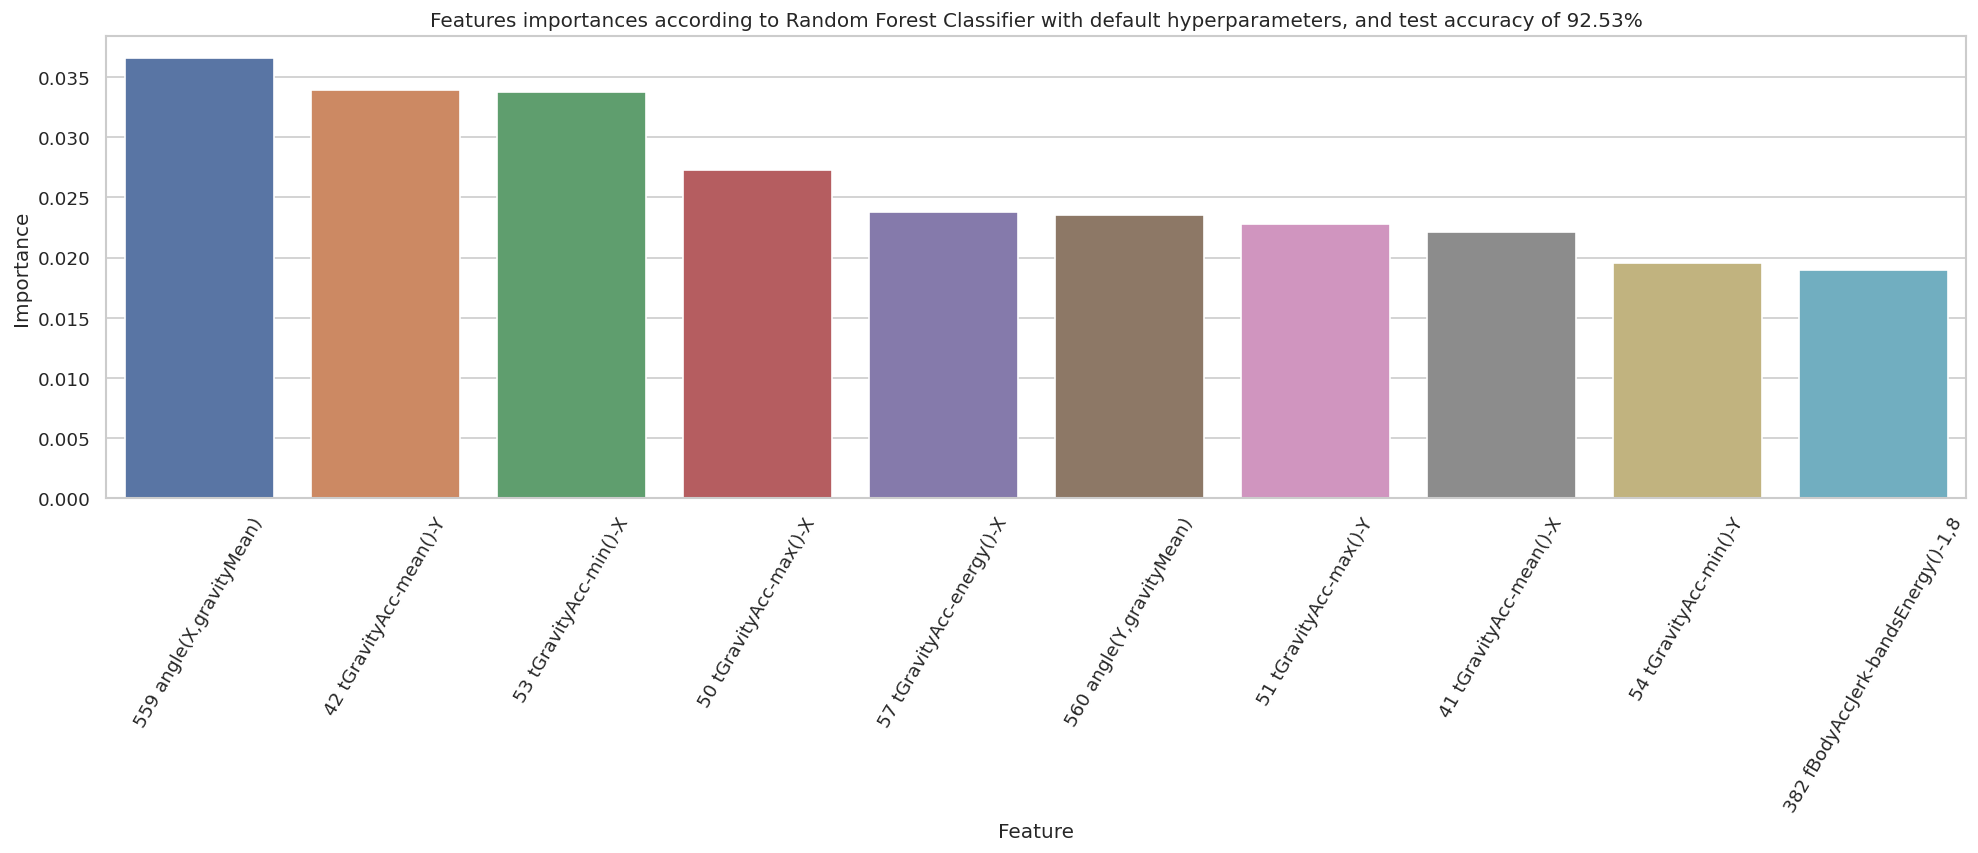

In [ ]:
sns.set_theme(style='whitegrid', rc={'figure.dpi': 120}, font_scale=1)
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x='feature', y='importance', data=feature_importances.head(10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
plt.title(f"Features importances according to Random Forest Classifier with default hyperparameters, and test accuracy of {round(rfc_test_accuracy,4)*100}%")
plt.show()
# feature_importances.head(20)